In [35]:
import numpy as np
import copy

prog_sums = {
    'load_sums' : [],
    'bought_sums' : [],
    'pv_sums' : [],
    'sold_sums' : [],
    'wasted_sums' : []
}

prio_sums = copy.deepcopy(prog_sums)
ml_sums = copy.deepcopy(prog_sums)

for d, name_scheme in zip([ml_sums, prog_sums, prio_sums], [
    '../ml/evaluations/{}.csv',
    '../simulation/mat_evaluations/{}_prog.csv',
    '../simulation/mat_evaluations/{}_prio.csv',
]):
    for i in range(100):
        data = np.genfromtxt(name_scheme.format(i), delimiter=';')
        d['load_sums'].append(np.sum(data[:,1]))
        d['pv_sums'].append(np.sum(data[:,2]))
        d['sold_sums'].append(np.sum(data[:,6]))
        d['bought_sums'].append(np.sum(data[:,5]))
        d['wasted_sums'].append(np.sum(data[:,7]))
        print(i)

    print('done')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done


In [36]:
for d in [ml_sums, prio_sums, prog_sums]:
    load_sums =  np.array(d['load_sums'])
    bought_sums = np.array(d['bought_sums'])
    pv_sums = np.array(d['pv_sums'])
    sold_sums = np.array(d['sold_sums'])
    wasted_sums = np.array(d['wasted_sums'])

    d['pv_load_ratio'] = -pv_sums/load_sums
    d['svg'] = 1-bought_sums/load_sums
    d['ev'] = (-pv_sums-wasted_sums-sold_sums)/-pv_sums
    d['ar'] = wasted_sums/-pv_sums

    print(np.mean(d['svg']))

0.5426257932984508
0.6396364326650464
0.6280070869031945


1.4222582755064783
1.4222582755064783
1.4222582755064783


Text(0, 0.5, 'Abregelungsverluste')

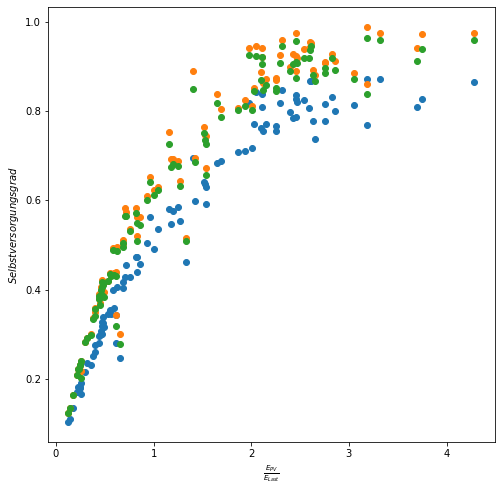

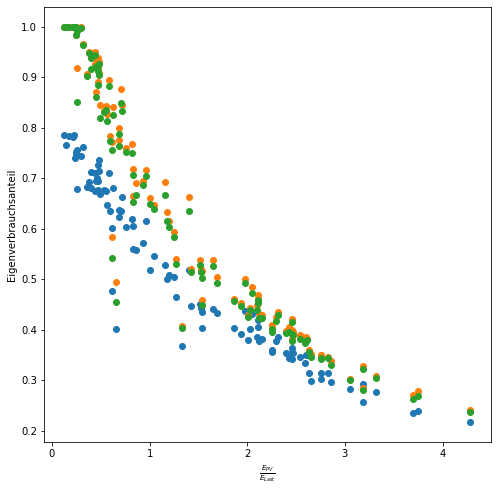

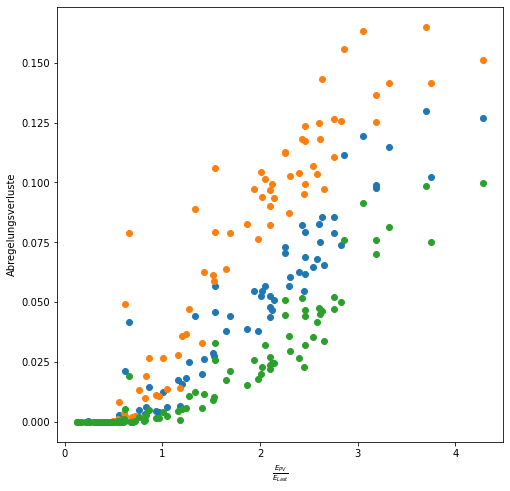

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
for d in [ml_sums, prio_sums, prog_sums]:
    print(np.mean(d['pv_load_ratio']))
    ax.scatter(d['pv_load_ratio'], d['svg'])
ax.set_xlabel('$\\frac{E_{PV}}{E_{Last}}$')
ax.set_ylabel('$Selbstversorgungsgrad$')

fig, ax = plt.subplots(figsize=(8,8))
for d in [ml_sums, prio_sums, prog_sums]:
    ax.scatter(d['pv_load_ratio'], d['ev'])
ax.set_xlabel('$\\frac{E_{PV}}{E_{Last}}$')
ax.set_ylabel('Eigenverbrauchsanteil')

fig, ax = plt.subplots(figsize=(8,8))
for d in [ml_sums, prio_sums, prog_sums]:
    ax.scatter(d['pv_load_ratio'], d['ar'])
ax.set_xlabel('$\\frac{E_{PV}}{E_{Last}}$')
ax.set_ylabel('Abregelungsverluste')

